In [97]:
import pandas as pd
import numpy as np
import csv
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.animation as animation
from time import sleep
import pycountry
import plotly.express as px

In [98]:
# step 1 get the date using url here.
# using - https://ourworldindata.org/coronavirus-source-data as data source.
# Pulling down new deaths and total deaths per country.

url_new_deaths ="https://covid.ourworldindata.org/data/ecdc/new_deaths.csv"
new_deaths=pd.read_csv(url_new_deaths)

url_total_deaths ="https://covid.ourworldindata.org/data/ecdc/total_deaths.csv"
total_deaths=pd.read_csv(url_total_deaths)


In [99]:
#list(new_deaths.columns.values) 
#list(total_deaths.columns.values) 


In [100]:
new_deaths.head(5)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [101]:
total_deaths.head(5)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [102]:
# step 2 filters to world data. 
# for plotting, I only want the date and no of deaths in one country. 

total_deaths_world = total_deaths[['date','World']]
total_deaths_world.head(5)

#new_deaths_world = new_deaths[['date','World']]
#new_deaths_world.head(5)

,date,World
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


In [103]:
new_deaths_world = new_deaths[['date','World']]
new_deaths_world.head(5)

,date,World
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


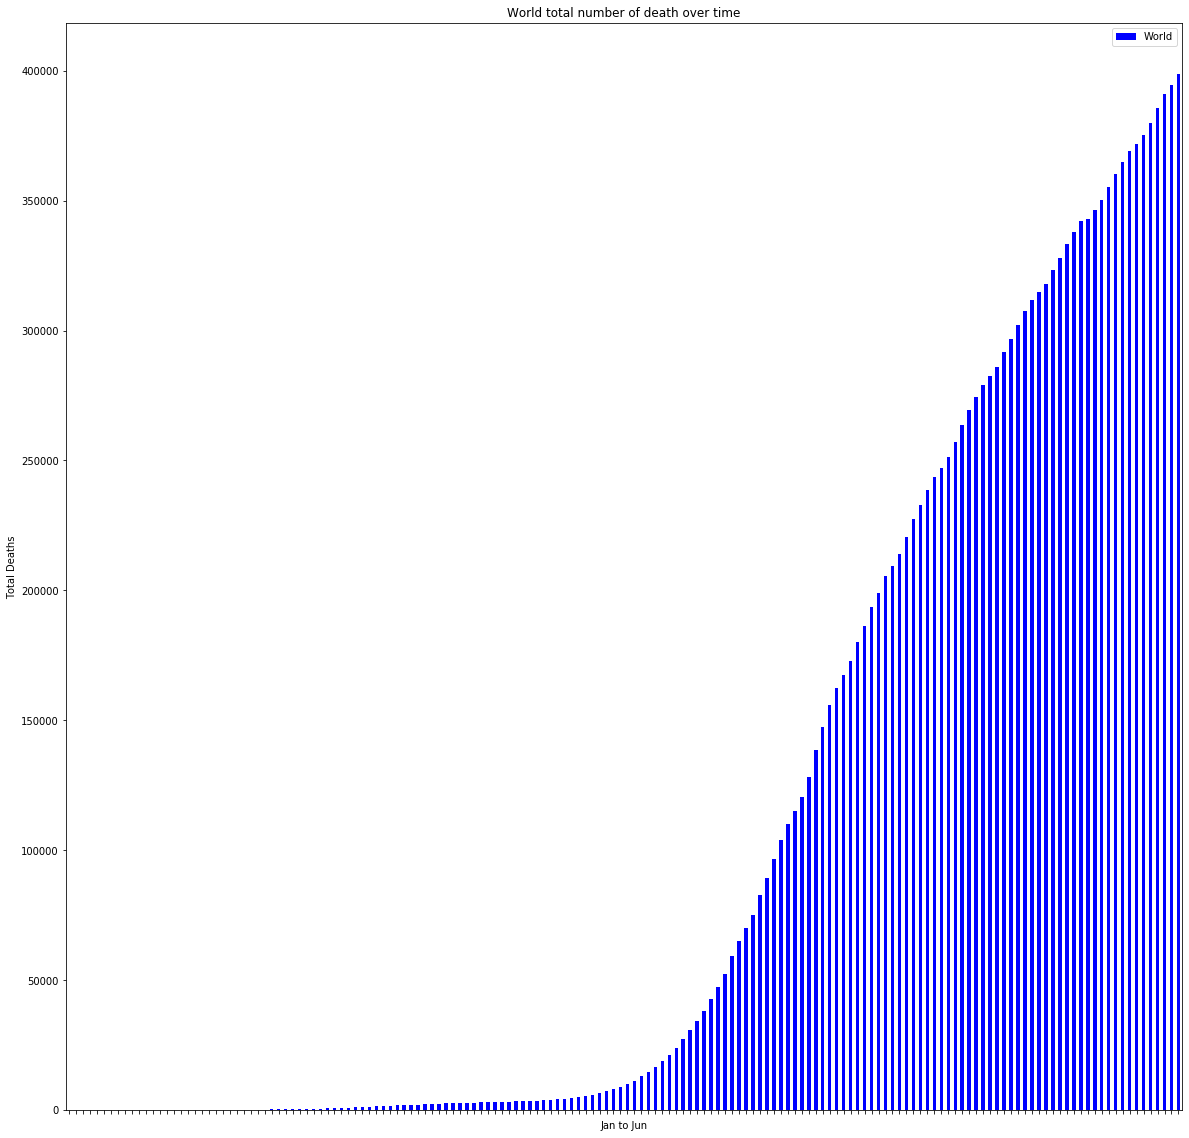

In [104]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
total_deaths_world.plot(kind = 'bar', title= "World total number of death over time", x = 'date', y = 'World', color = 'blue', ax = ax1)
plt.xlabel("Jan to Jun")
plt.ylabel("Total Deaths")
ax1.set_xticklabels([])
plt.savefig('World_Total_Numbers_deaths_overtime.png')
plt.show()




In [105]:
# From the plot above, it looks like the virus is still spreading in the world. there is no tappering off of the curve 
#as yet

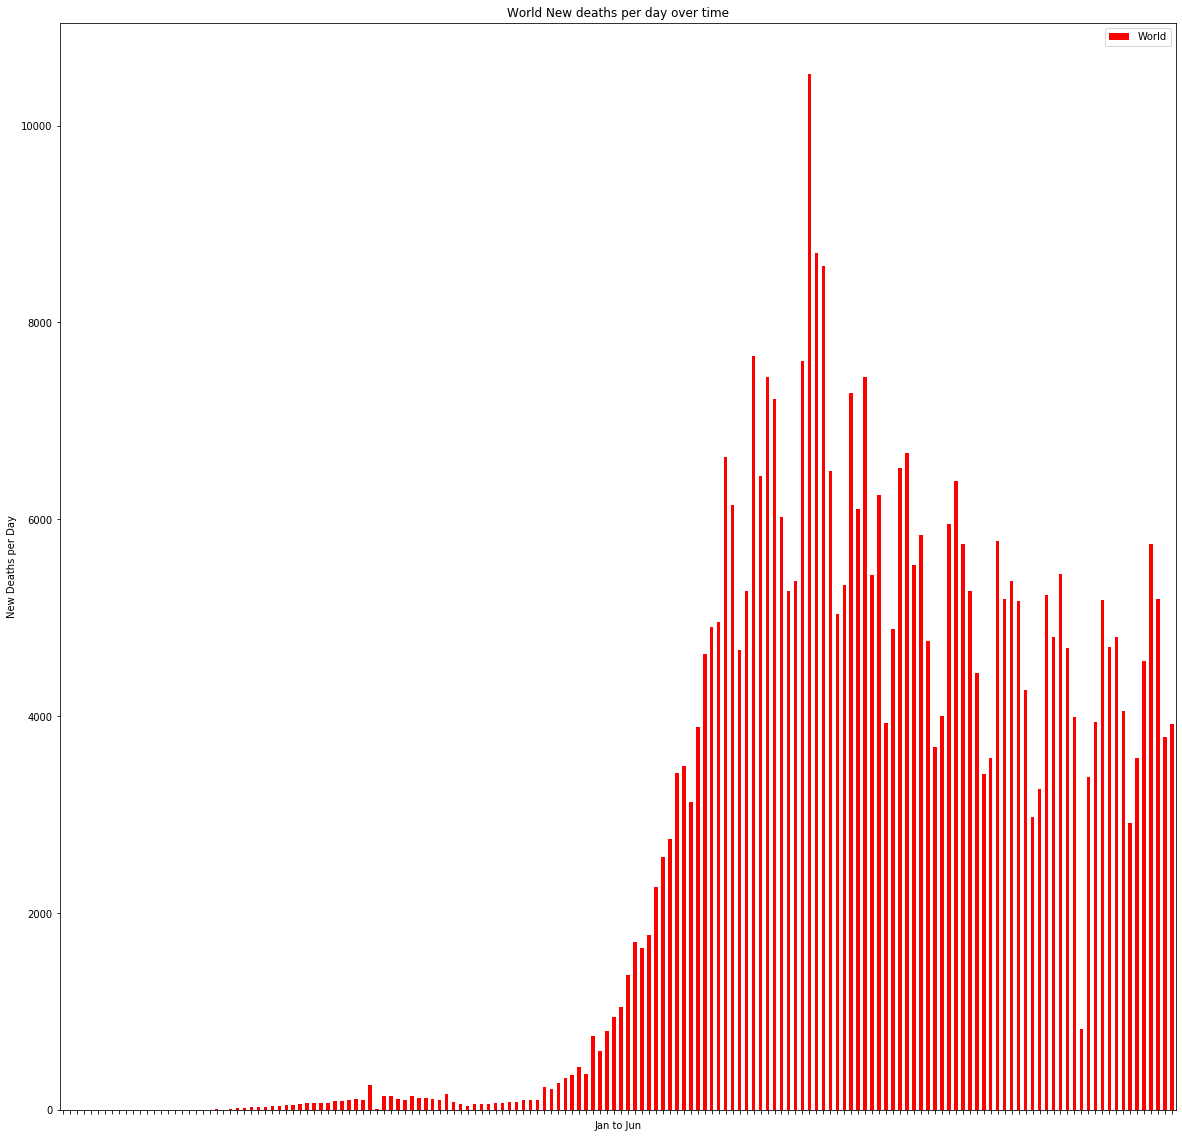

In [106]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plat larger
ax1 = plt.gca()
new_deaths_world.plot(kind = 'bar', title= "World New deaths per day over time", x = 'date', y = 'World', color = 'red', ax = ax1)
plt.xlabel("Jan to Jun")
plt.ylabel("New Deaths per Day")
ax1.set_xticklabels([])
plt.savefig('World_New_Deaths_overtime.png')
plt.show()



In [107]:
# While this is a spike in new_deaths, it does look as if the world  curve has ths long jaggedy tail, we see in each country 
# below. Again suggesting that the virus is still spreading to new countries and new areas. 

In [108]:
# lets look at a few individual countries.
# plotting ireland's data

new_deaths_ireland = new_deaths[['date','Ireland']]
new_deaths_ireland.head(5)

,date,Ireland
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


In [109]:
# and Total deaths in ireland
total_deaths_ireland = total_deaths[['date','Ireland']]
total_deaths_ireland.head(5)

,date,Ireland
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


<function matplotlib.pyplot.show(*args, **kw)>

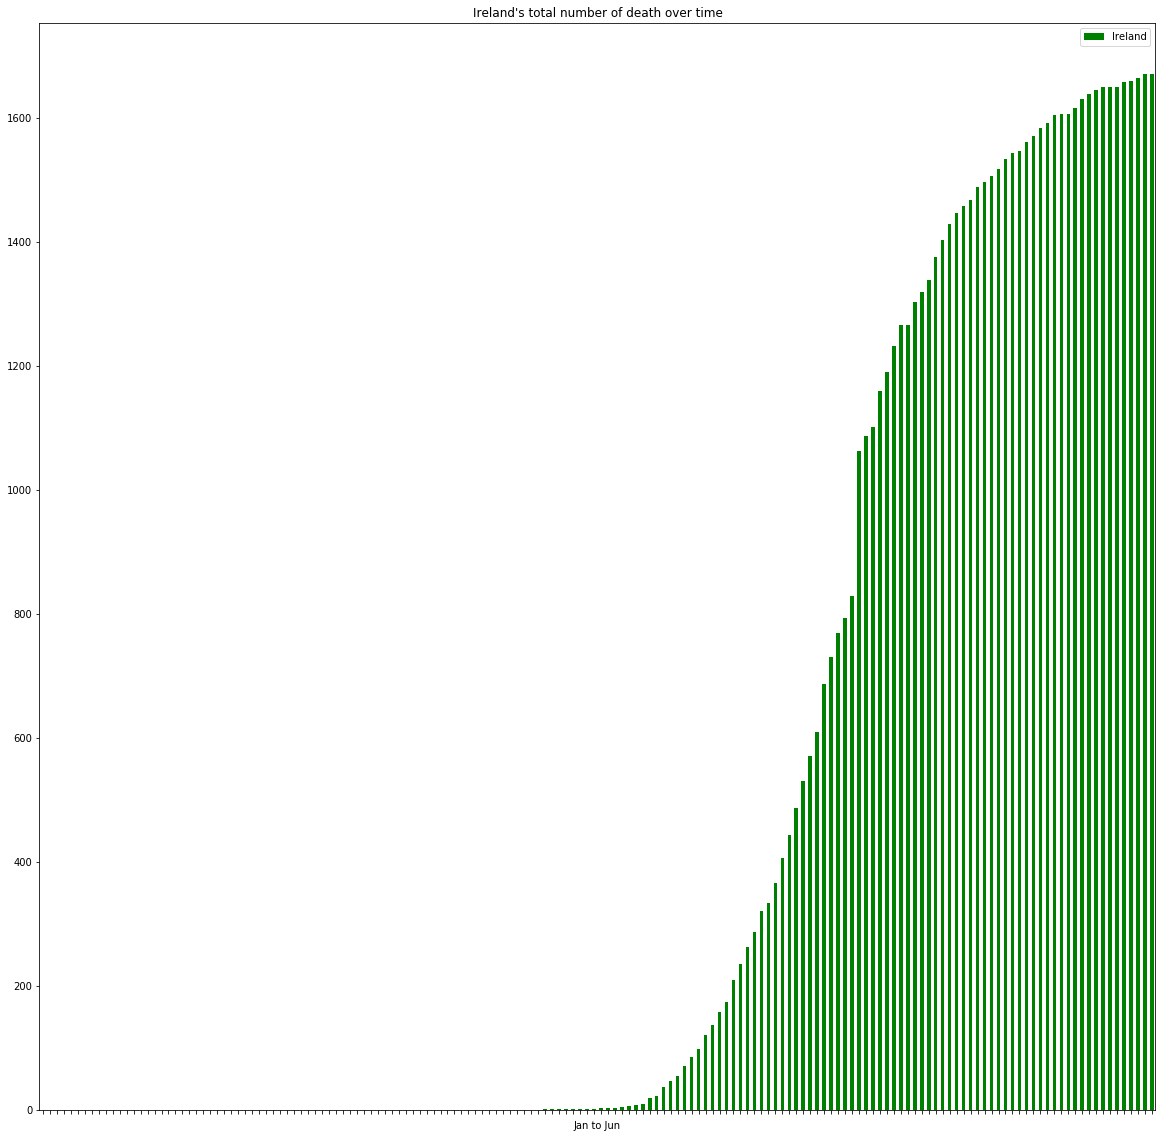

In [110]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
total_deaths_ireland.plot(kind = 'bar', title= "Ireland's total number of death over time", x = 'date', y = 'Ireland', color = 'green', ax = ax1)
plt.xlabel("Jan to Jun")
ax1.set_xticklabels([])
plt.savefig('Ireland_Total_Numbers_deaths_overtime.png')
plt.show


In [111]:
# The curve of total deaths - this shows a steep curve followed by a gradual flattening at the restrictions in movements
# kicked in. 

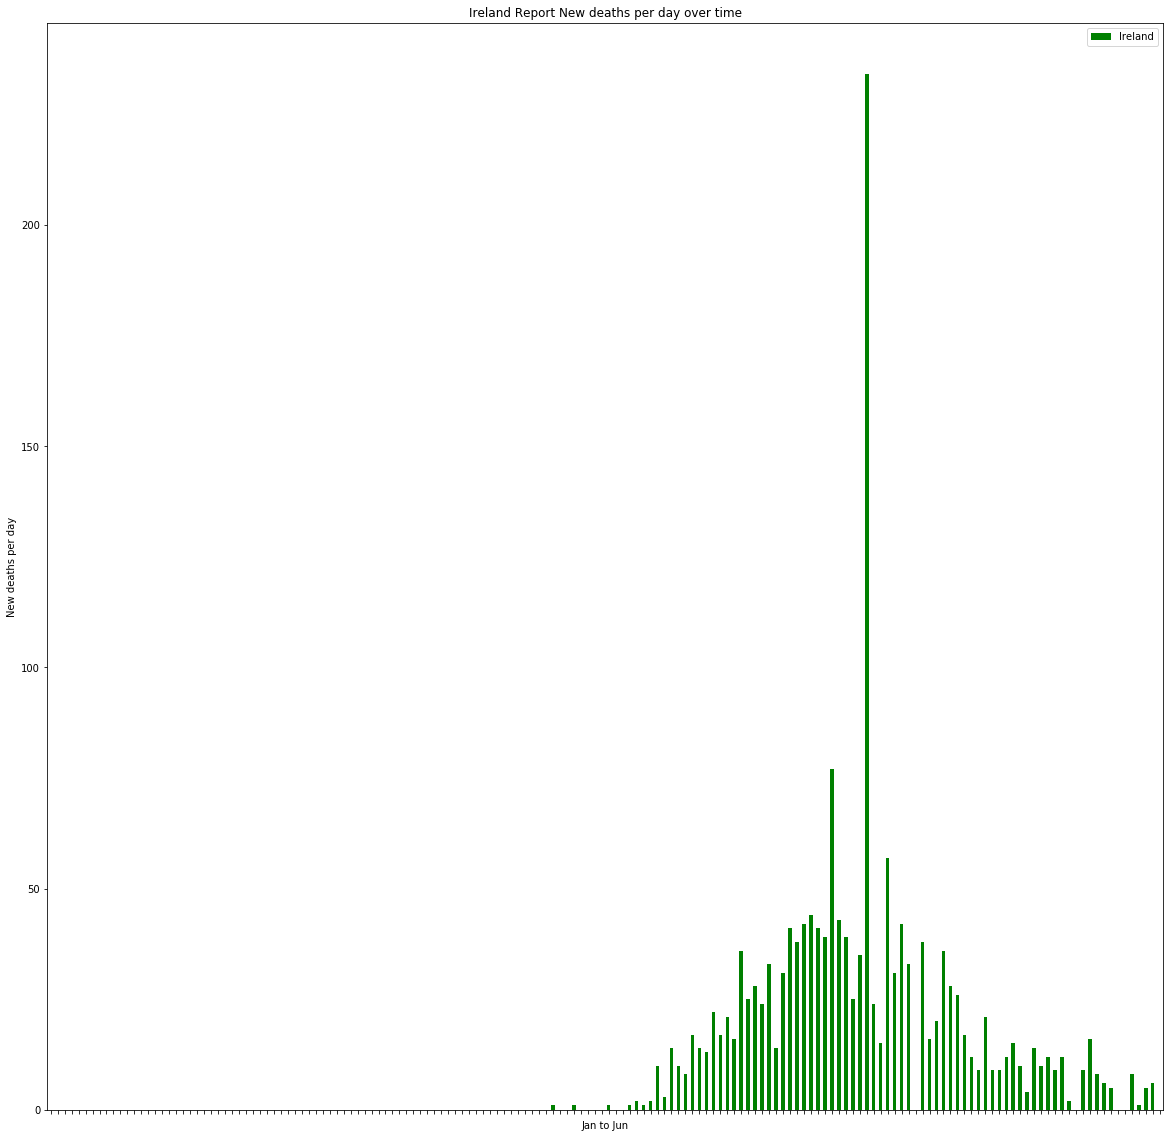

In [112]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
new_deaths_ireland.plot(kind = 'bar', title= "Ireland Report New deaths per day over time", x = 'date', y = 'Ireland', color = 'green', ax = ax1)
plt.xlabel("Jan to Jun")
plt.ylabel('New deaths per day')
ax1.set_xticklabels([])
plt.savefig('Ireland_Total_Numbers_deaths_overtime.png')

plt.show()



In [113]:
# The spike in the curve above is when the HSE included a number of deaths in nursing homes- and so it a bit of an outlier, 
# aside from that the curve is step incline, followed by slow jaggy tail off. This will be seen again below for other 
# countries. 

In [114]:
# From the 4 graphs above, Ireland is after its peak, but the world has yet to reach its peak. 
# So the virus is still spreading to new countries. 

In [115]:
# Trying another data set - https://ourworldindata.org/coronavirus-source-data - but this time, we have a numberof other 
# columns
coviddata= pd.read_csv('owid-covid-data.csv')


In [116]:
coviddata.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [117]:
#coviddata.info
#coviddata.shape

In [118]:
# been a bit too greedy with the data...far too much. 
# cutting it down to ireland only for now. 
# Filter for just the data on ireland
#coviddata_ire = coviddata[coviddata.location.eq('Ireland')]

In [119]:
# Filter for just the data for 6 countries which might be interesting

coviddata_ire = coviddata[coviddata.location.eq('Ireland')]
coviddata_chn = coviddata[coviddata.location.eq('China')]
coviddata_uk = coviddata[coviddata.location.eq('United Kingdom')]
coviddata_us = coviddata[coviddata.location.eq('United States')]
coviddata_italy = coviddata[coviddata.location.eq('Italy')]
coviddata_nz = coviddata[coviddata.location.eq('New Zealand')]



In [120]:
#coviddata_ire.dtypes

In [121]:
#date_axis = pd.Series(coviddata['date'].values, index=coviddata['date'])
#y_values_new_deaths = pd.Series(coviddata['new_deaths'].values)# , index=coviddata['new_deaths'])

In [122]:
#print(date_axis)
#print(y_values_new_deaths)


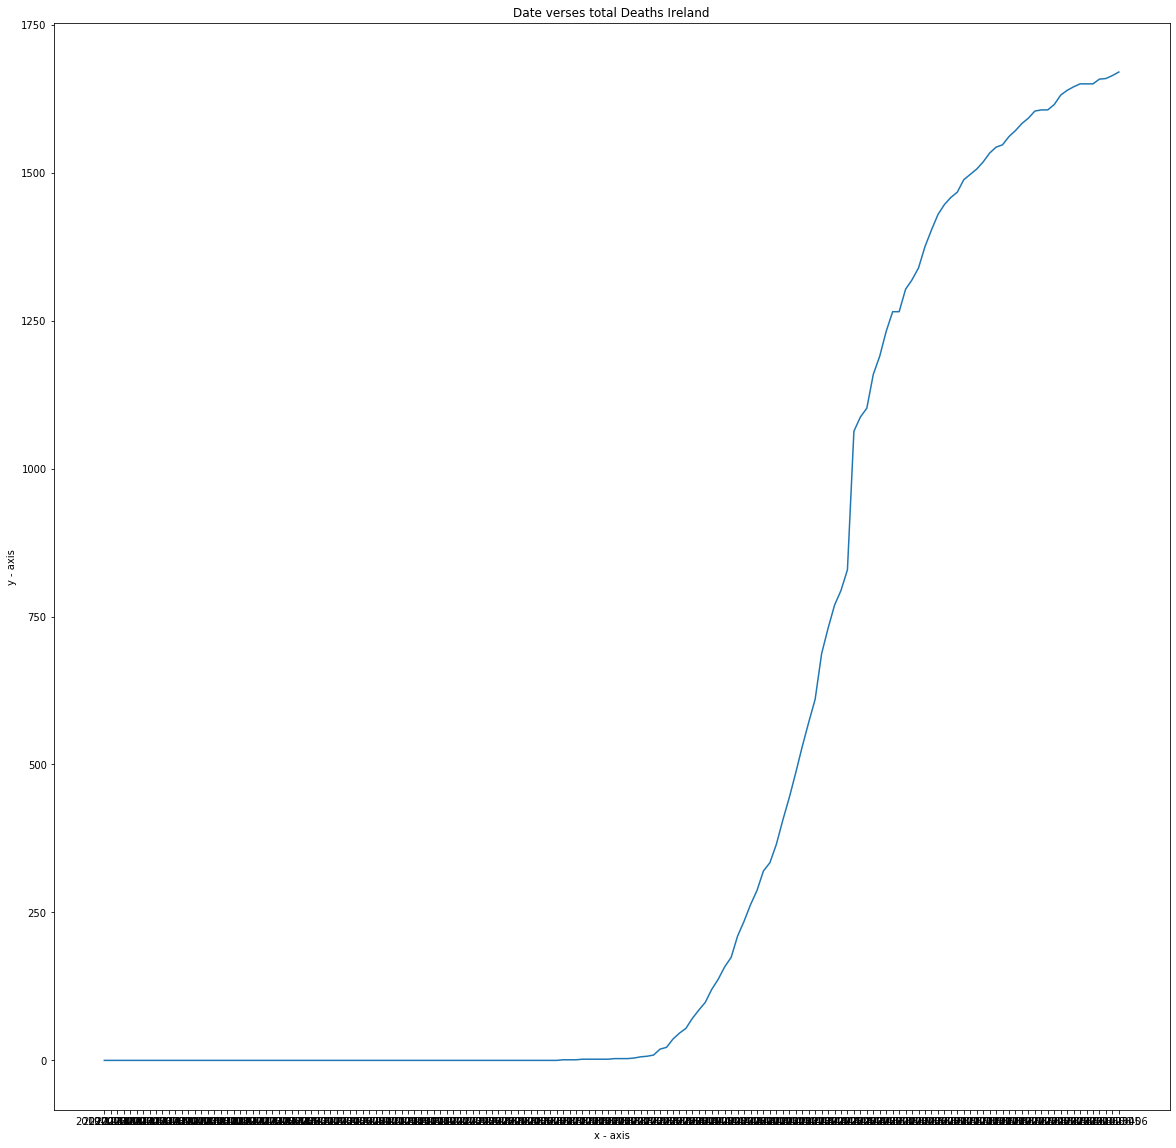

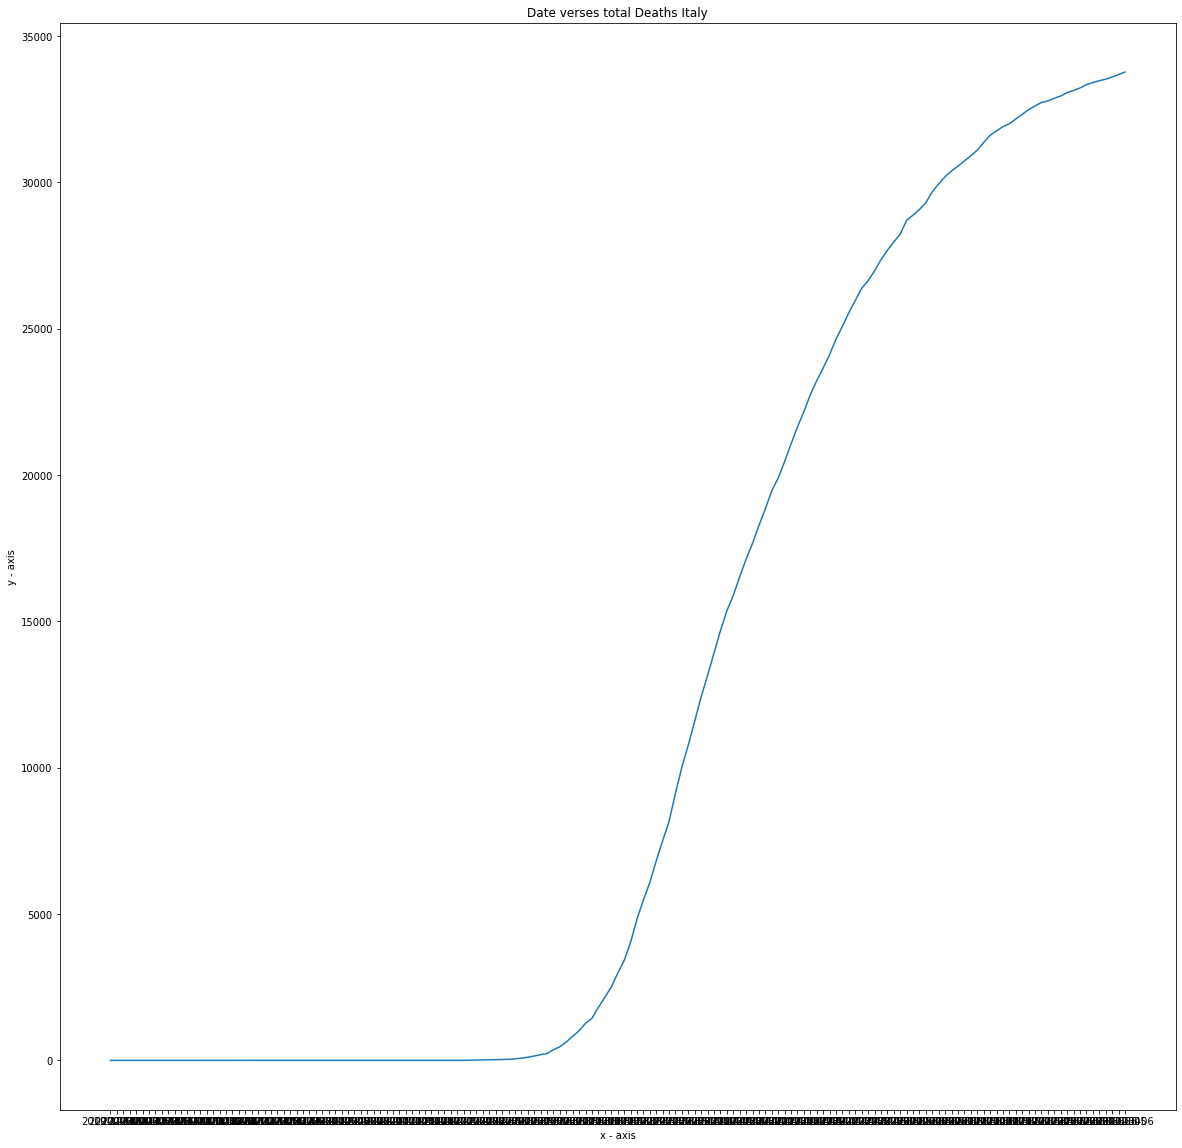

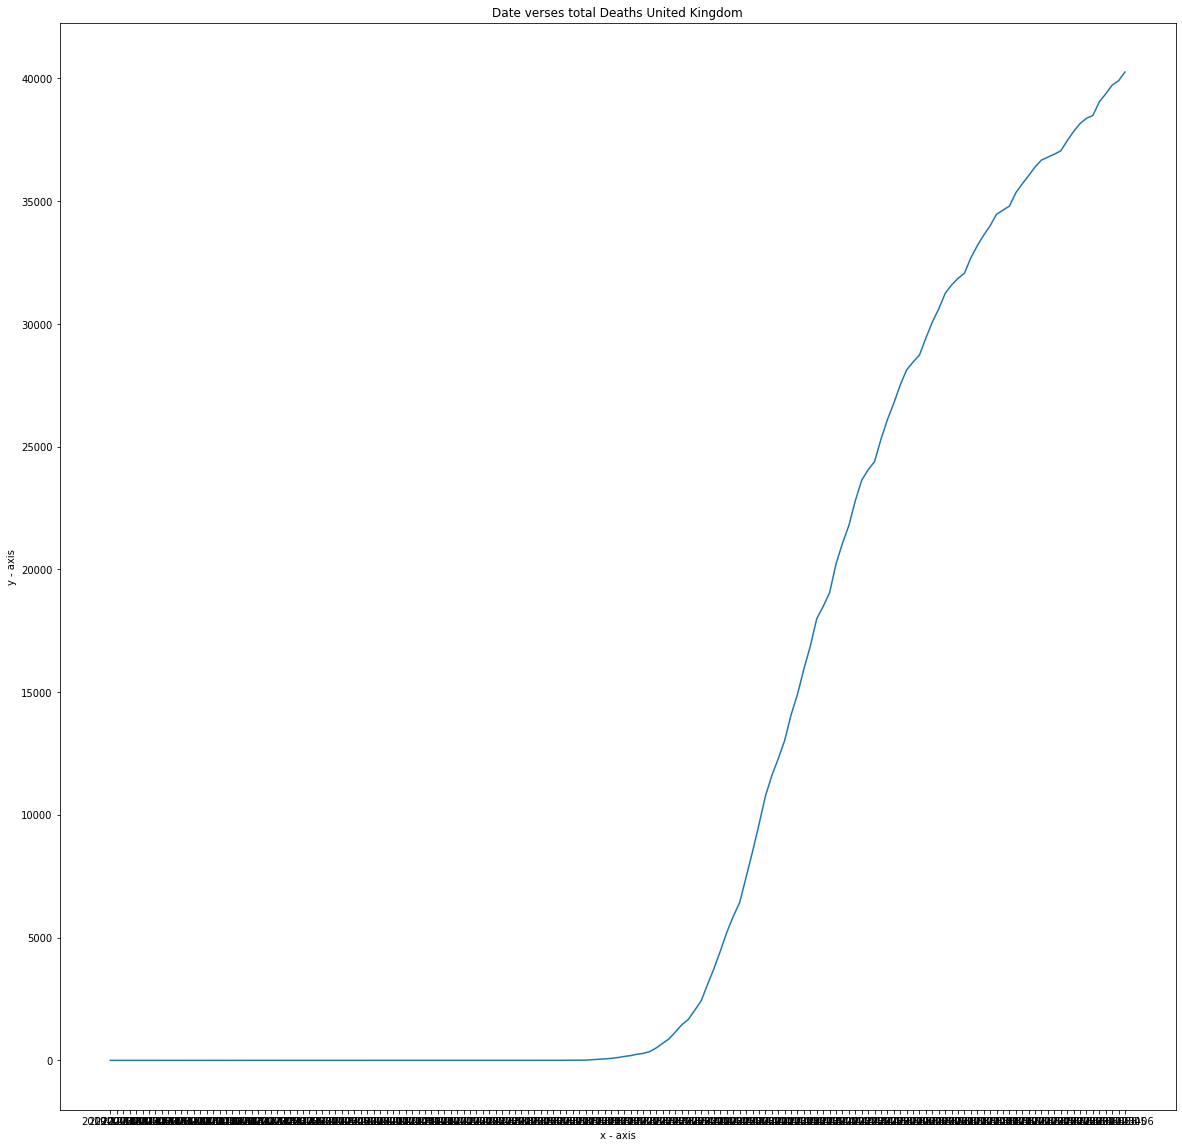

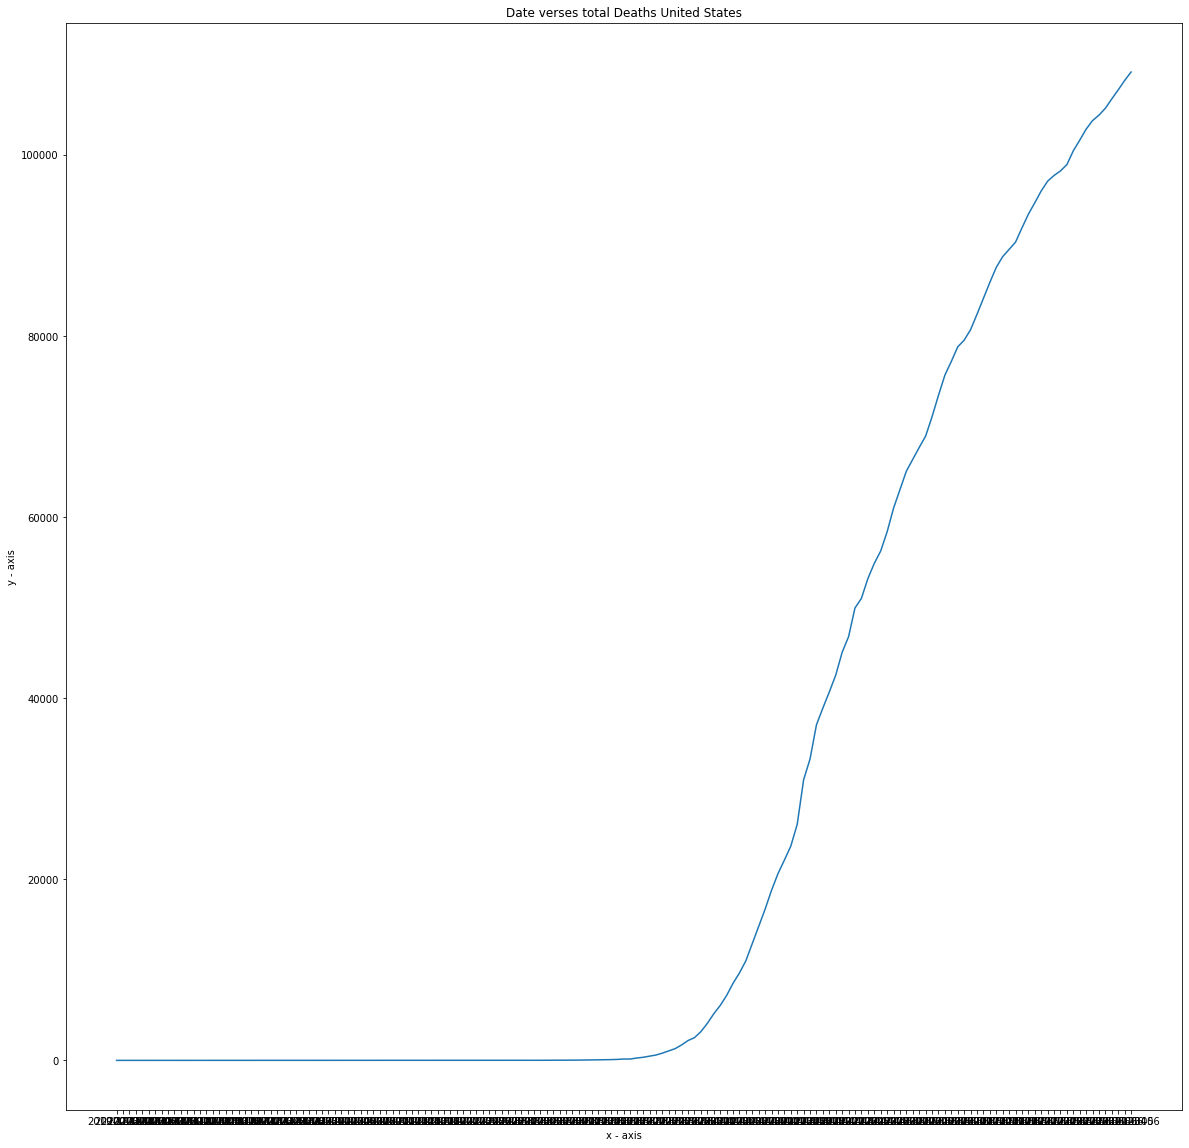

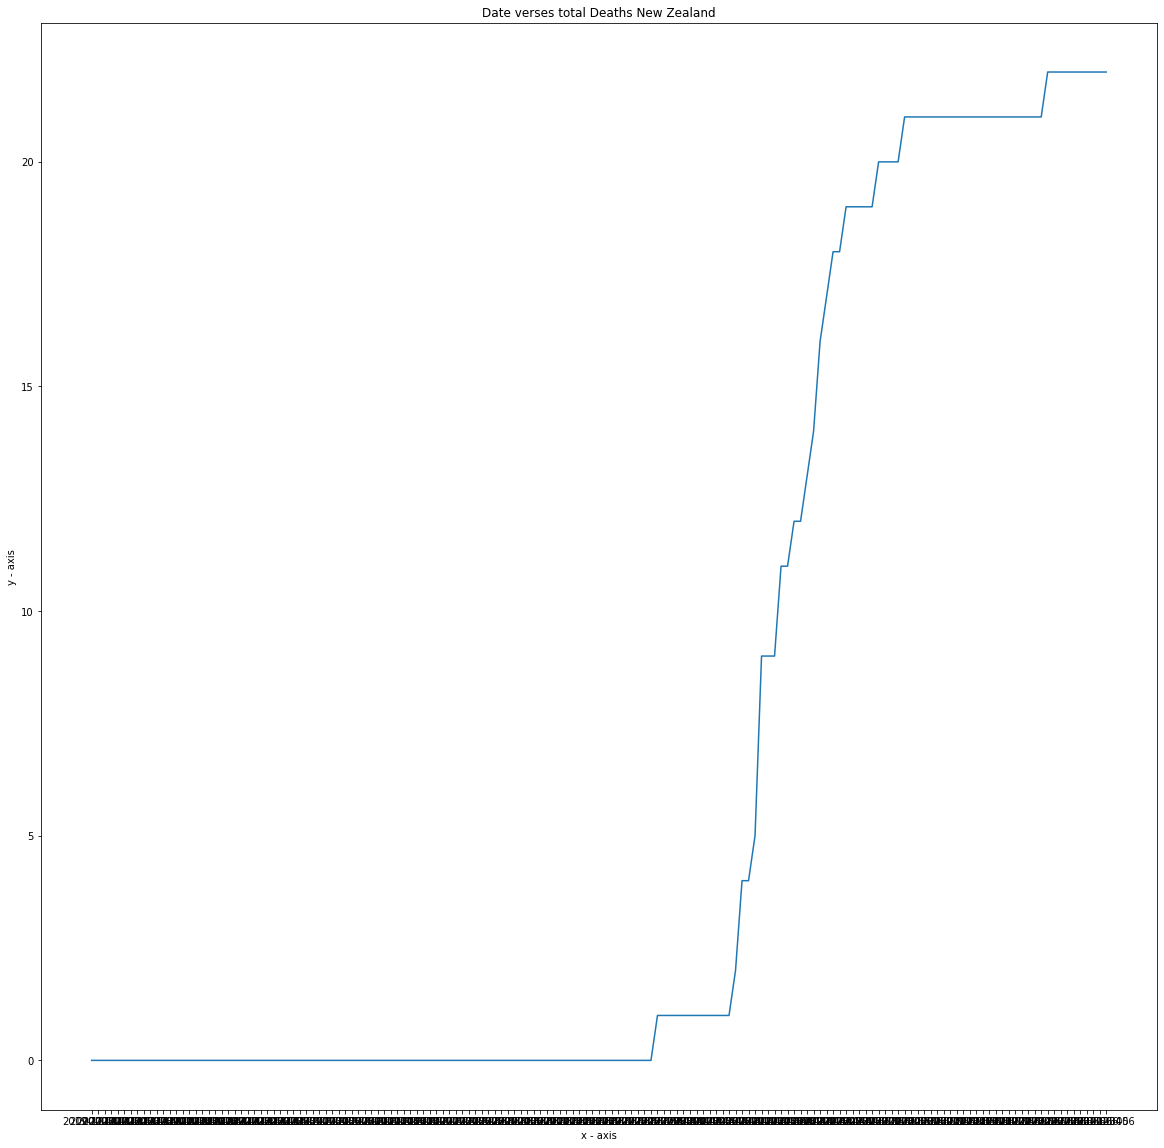

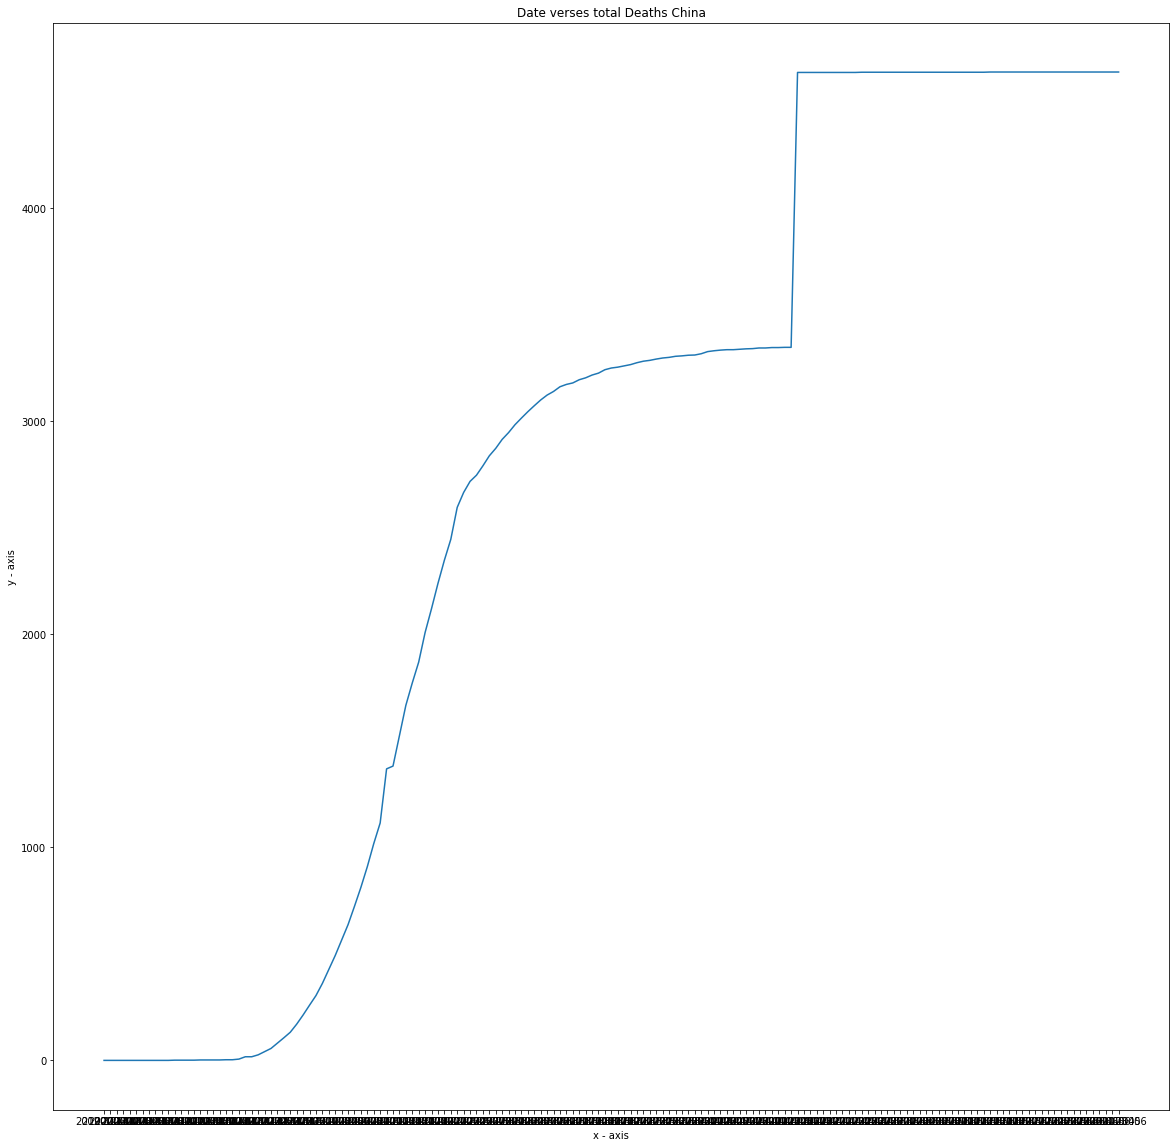

In [123]:
## PLot of total deaths per country.

#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis')


  
# giving a title to my graph 
plt.title('Date verses total Deaths Ireland') 
  
# function to show the plot 
plt.savefig('Ireland_total_deaths_overtime.png', dpi=300, bbox_inches='tight')
plt.show() 


#x axis values 
x = coviddata_italy.date 
# corresponding y axis values 
y = coviddata_italy.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Italy') 
  
# function to show the plot 
plt.savefig('Italy_total_deaths_overtime.png', dpi=300, bbox_inches='tight')
plt.show() 

#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths United Kingdom') 
  
# function to show the plot 
plt.savefig('UK_total_deaths_overtime.png', dpi=300, bbox_inches='tight')
plt.show() 

#x axis values 
x = coviddata_us.date 
# corresponding y axis values 
y = coviddata_us.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths United States') 
  
# function to show the plot 
plt.savefig('US_total_deaths_overtime.png', dpi=300, bbox_inches='tight')
plt.show() 

#x axis values 
x = coviddata_nz.date 
# corresponding y axis values 
y = coviddata_nz.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths New Zealand') 
  
# function to show the plot 
plt.savefig('New_Zealand_total_deaths_overtime.png', dpi=300, bbox_inches='tight')
plt.show() 


#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths China') 
  
# function to show the plot 
plt.savefig('China_total_deaths_overtime.png', dpi=300, bbox_inches='tight')
plt.show() 

In [124]:
# China has little or no new deaths, and also the sheer size and population of china, make the graph above look wrong.  
# Ireland, Italy, UK all have similarly shaped graphs.
# China has some steps towards the end. These are the adding of cases which were mis reported at the time.
# New Zealand has so few cases that the graph appears more stepped.
# The steep incline in both the UK and US suggests the virus is not under control in either of those countries

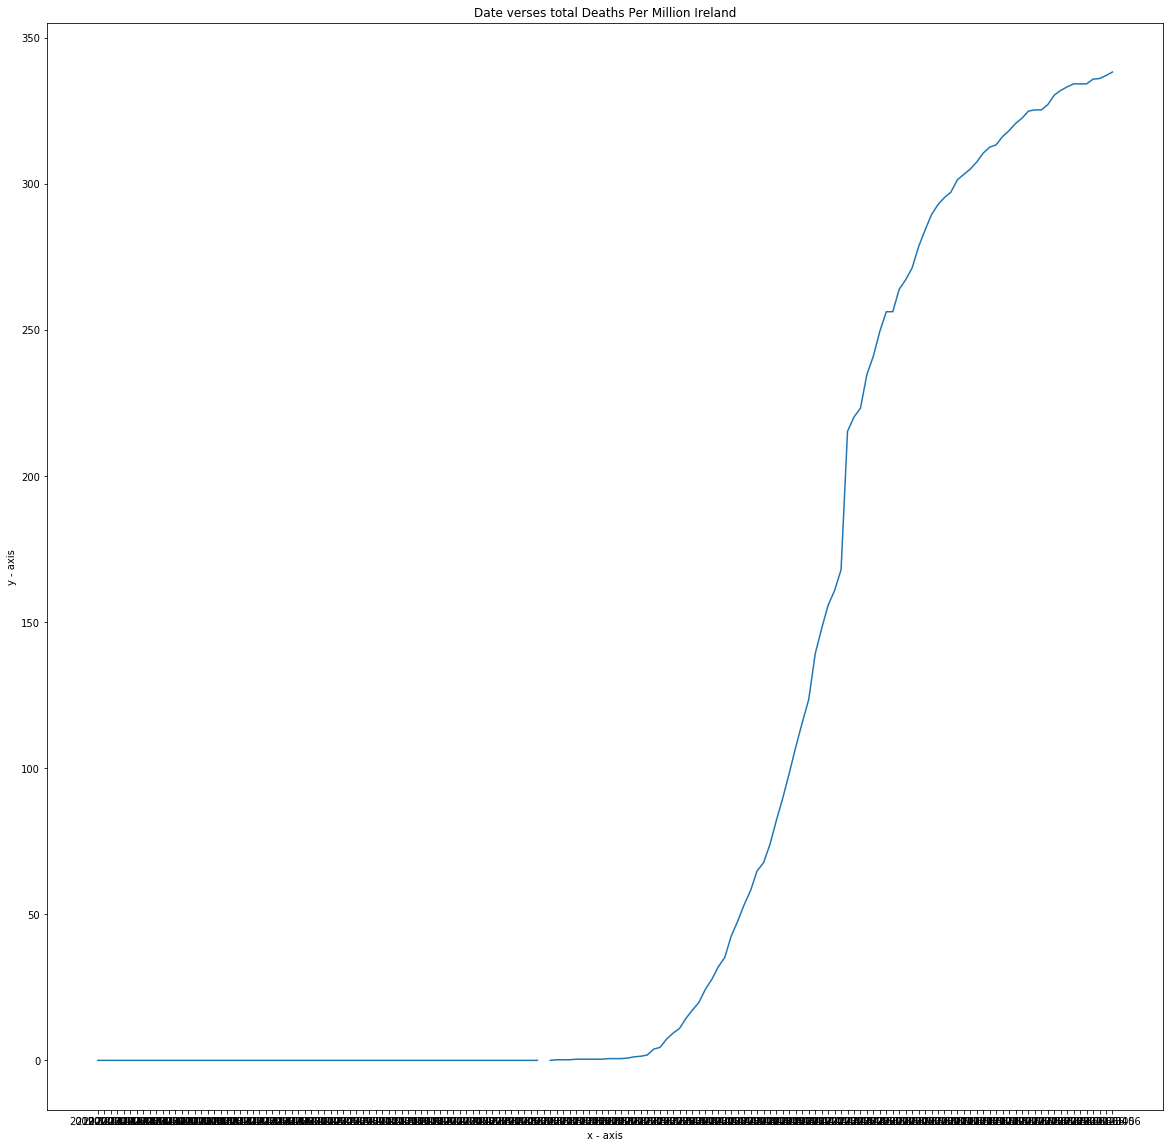

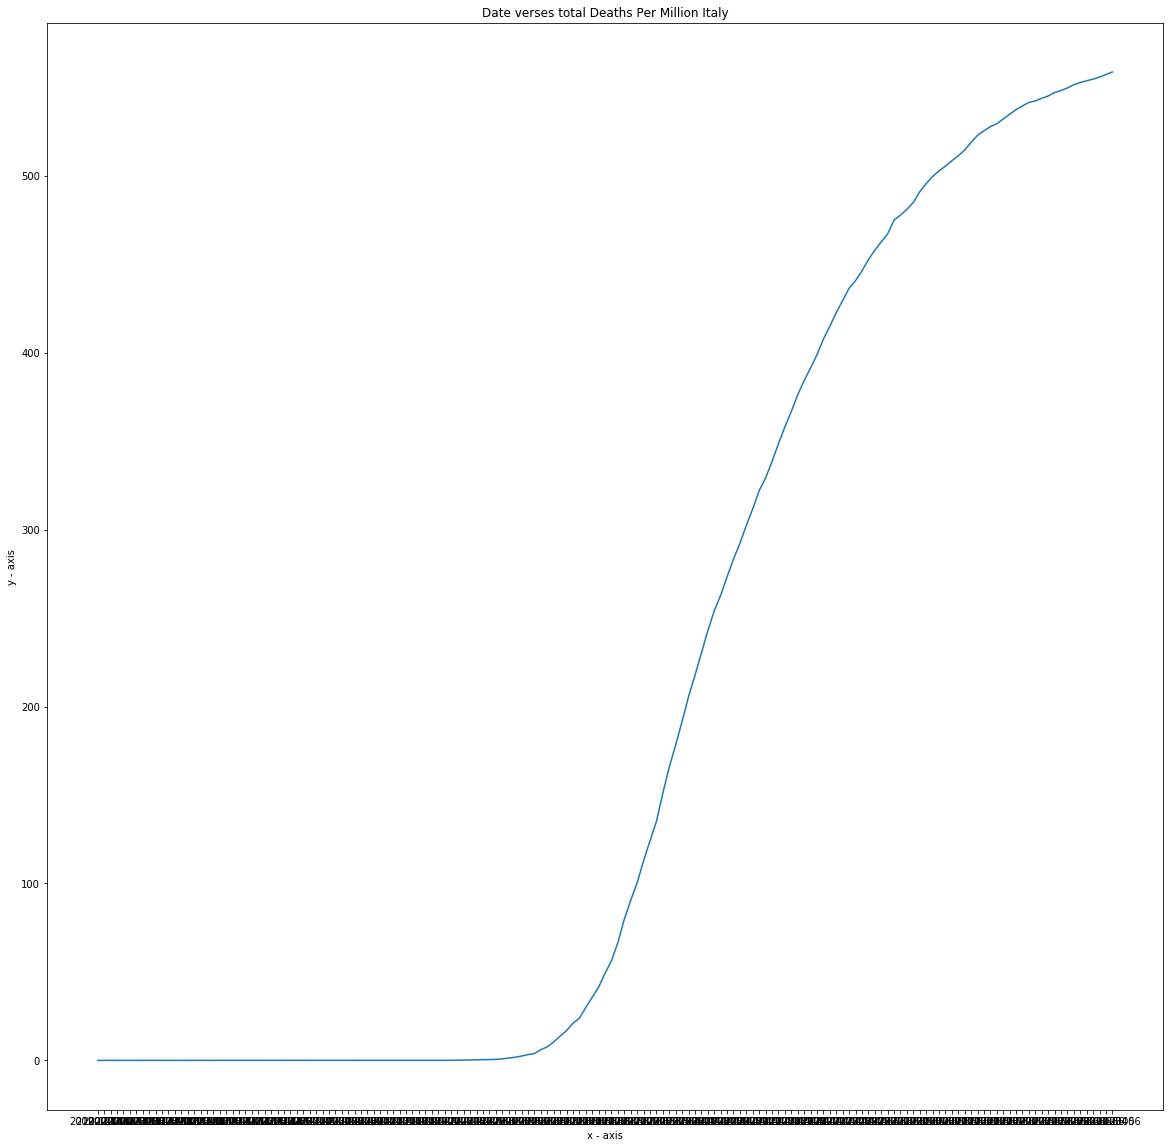

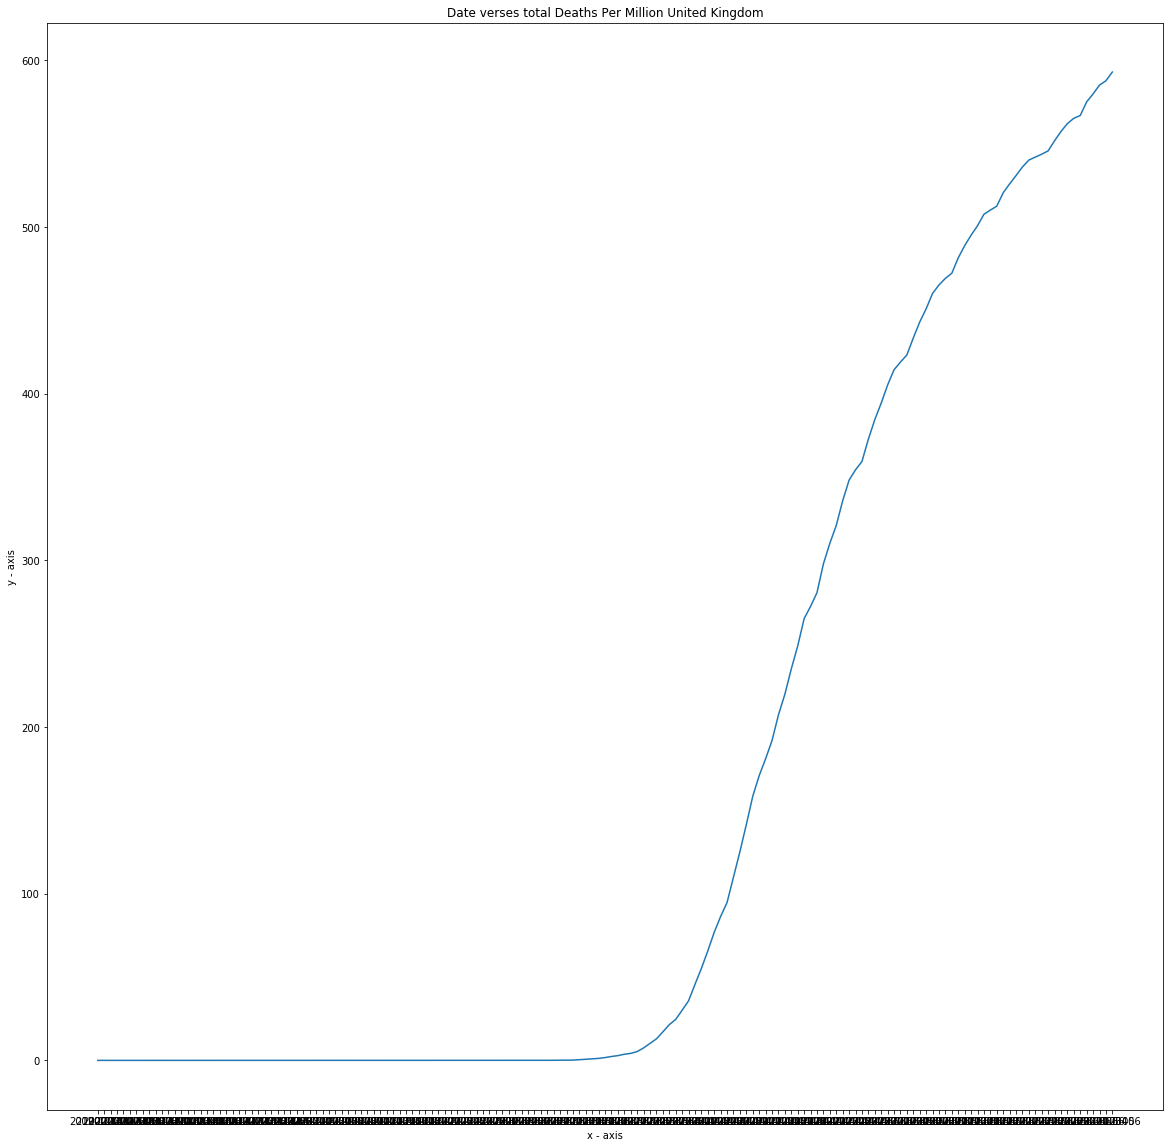

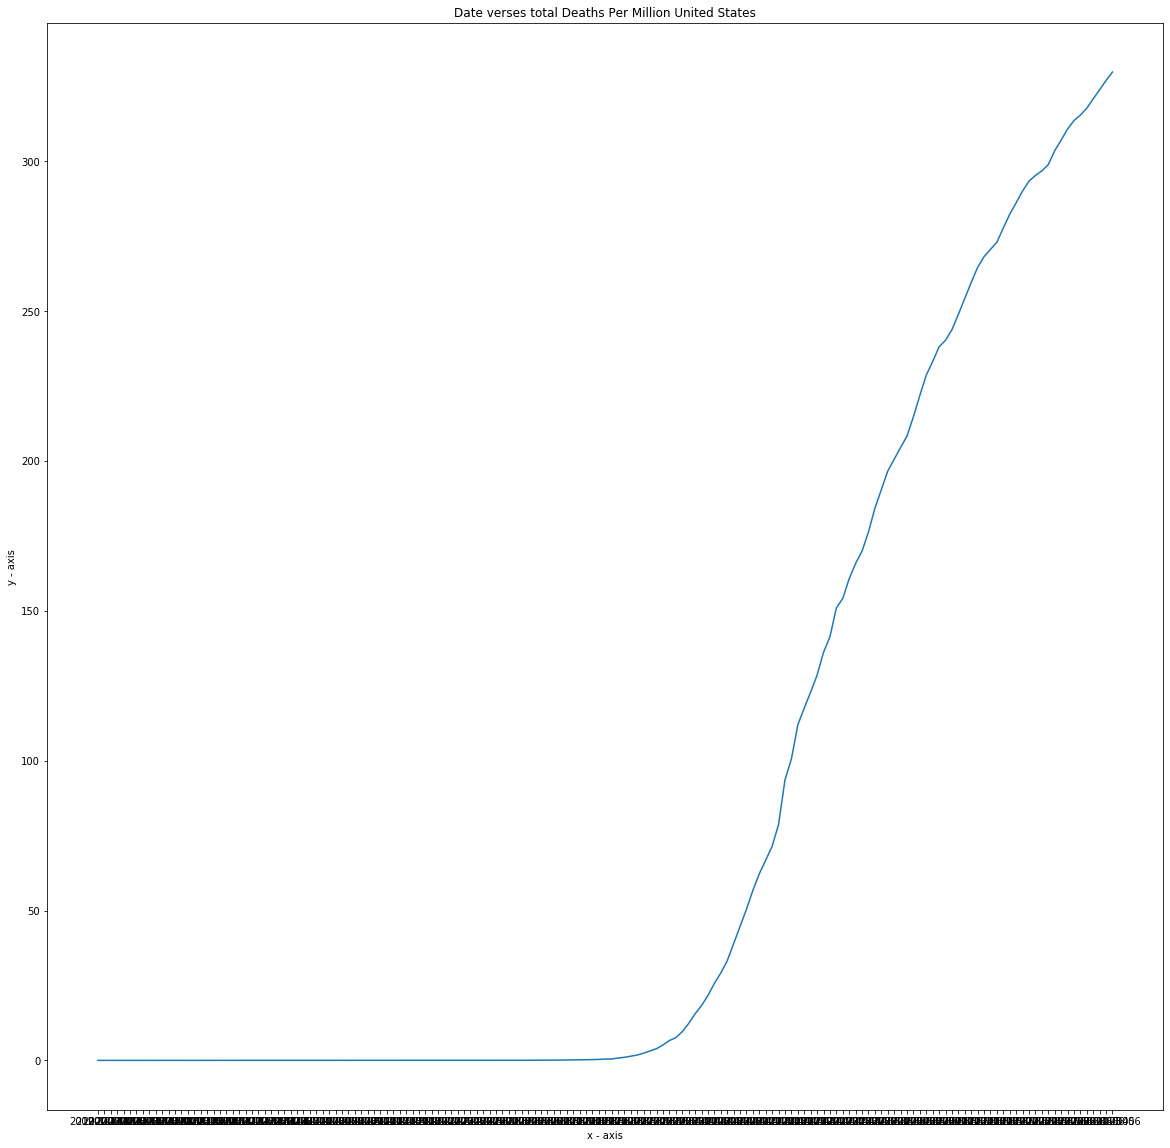

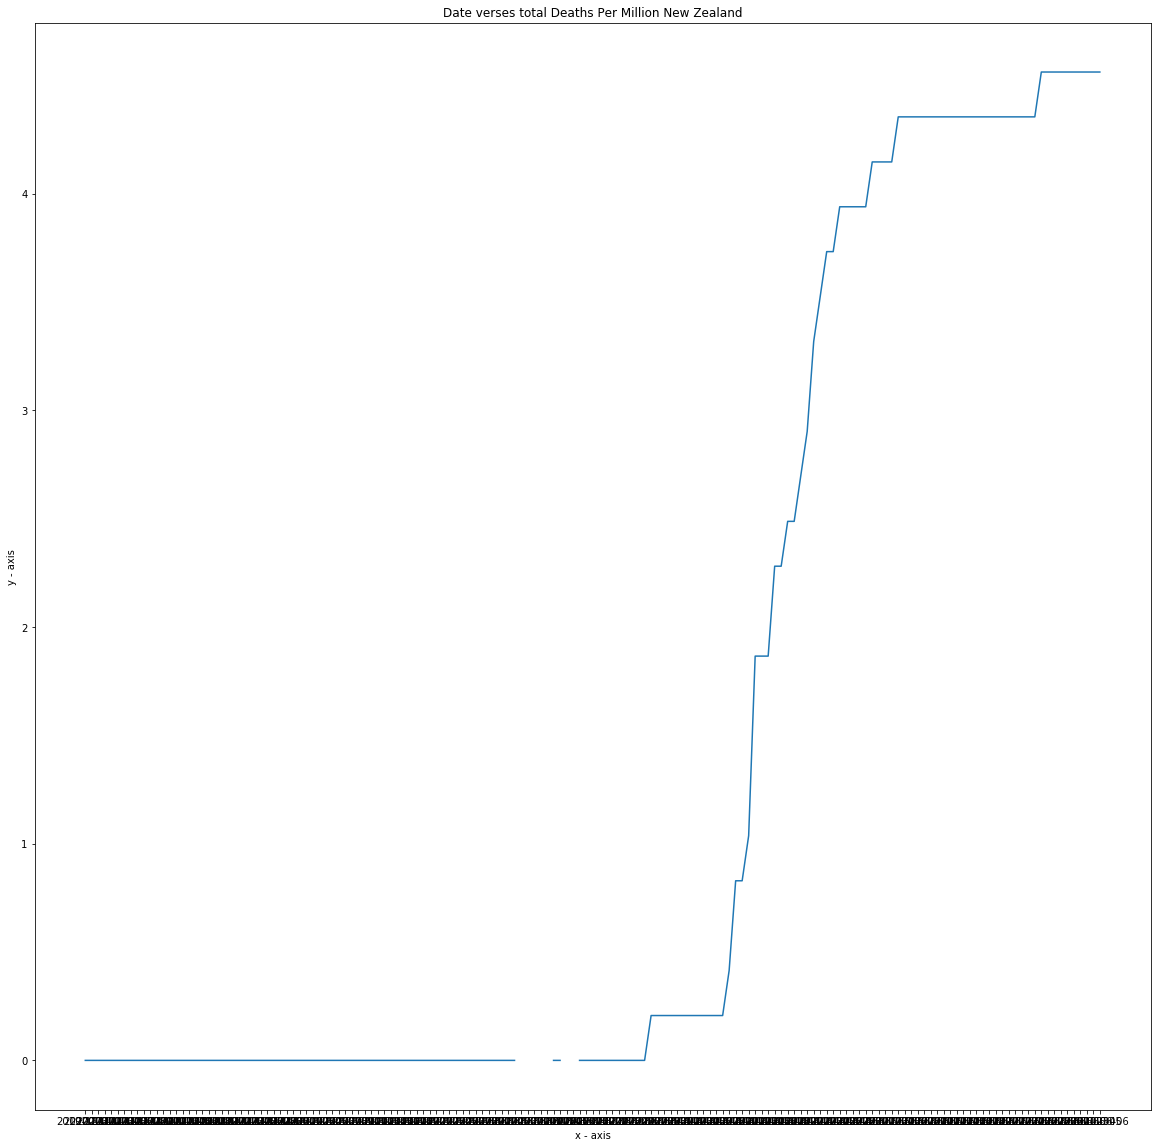

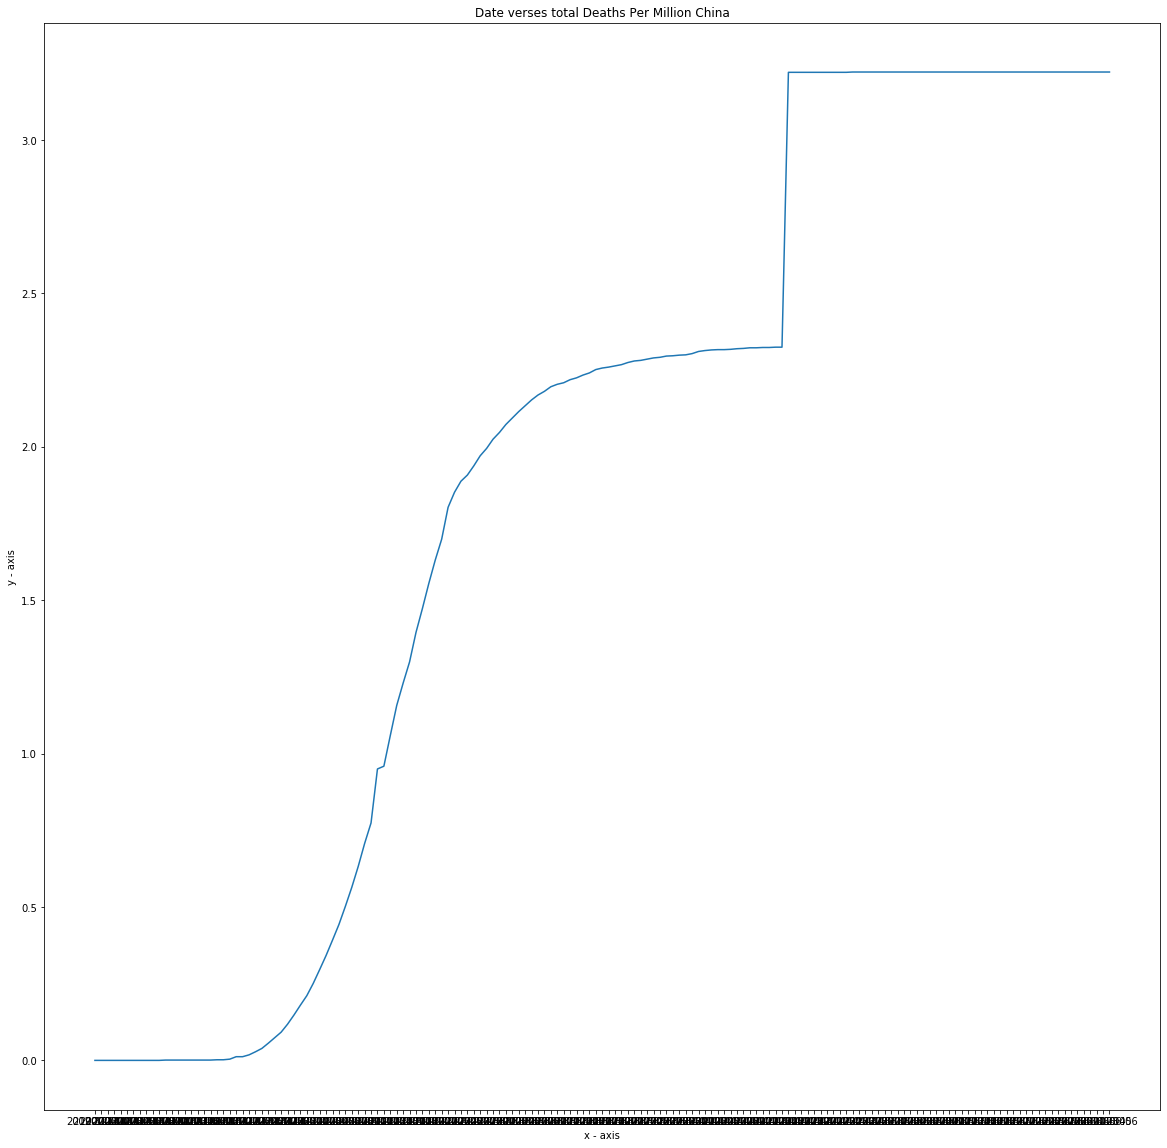

In [125]:
# populations differ so, Charting total deaths per million in all six countries.
#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million Ireland') 
plt.savefig('Ireland_total_deaths_per_million_overtime.png', dpi=300, bbox_inches='tight')
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_italy.date 
# corresponding y axis values 
y = coviddata_italy.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million Italy') 

plt.savefig('Italy_total_deaths_per_million_overtime.png', dpi=300, bbox_inches='tight')  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million United Kingdom') 
plt.savefig('UK_total_deaths_per_million_overtime.png', dpi=300, bbox_inches='tight')  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_us.date 
# corresponding y axis values 
y = coviddata_us.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million United States') 
plt.savefig('US_total_deaths_per_million_overtime.png', dpi=300, bbox_inches='tight')  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_nz.date 
# corresponding y axis values 
y = coviddata_nz.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million New Zealand') 
plt.savefig('New_Zealand_total_deaths_per_million_overtime.png', dpi=300, bbox_inches='tight')  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million China') 
plt.savefig('China_total_deaths_per_million_overtime.png', dpi=300, bbox_inches='tight')  
# function to show the plot 
plt.show() 

In [126]:
# China has a very low number of deaths per million, possible the information is swamped by the sheer size of the 
# population of china, make the graph above look wrong.  
# Ireland, Italy, UK all have similarly shaped graphs.- However Italy has approx 550 deaths per million, Ireland 350,
# UK has 600 and its still increasing. US 300 but its increasing. 
# China has some steps towards the end. These are the adding of cases which were mis reported at the time.
# New Zealand has so few cases that the graph appears more stepped.
# The steep incline in both the UK and US suggests the virus is not under control in either of those countries

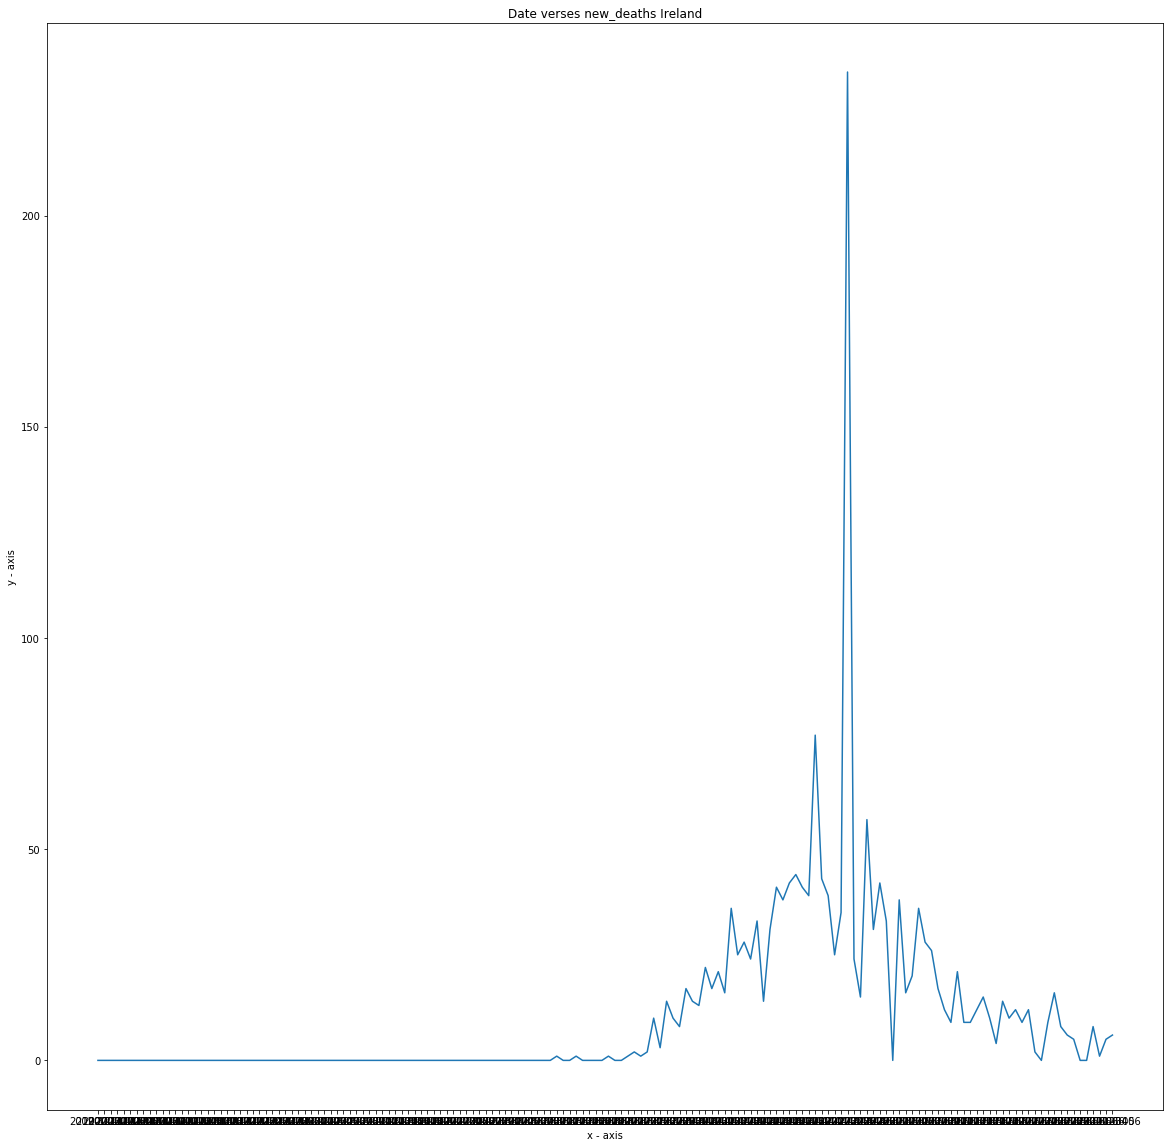

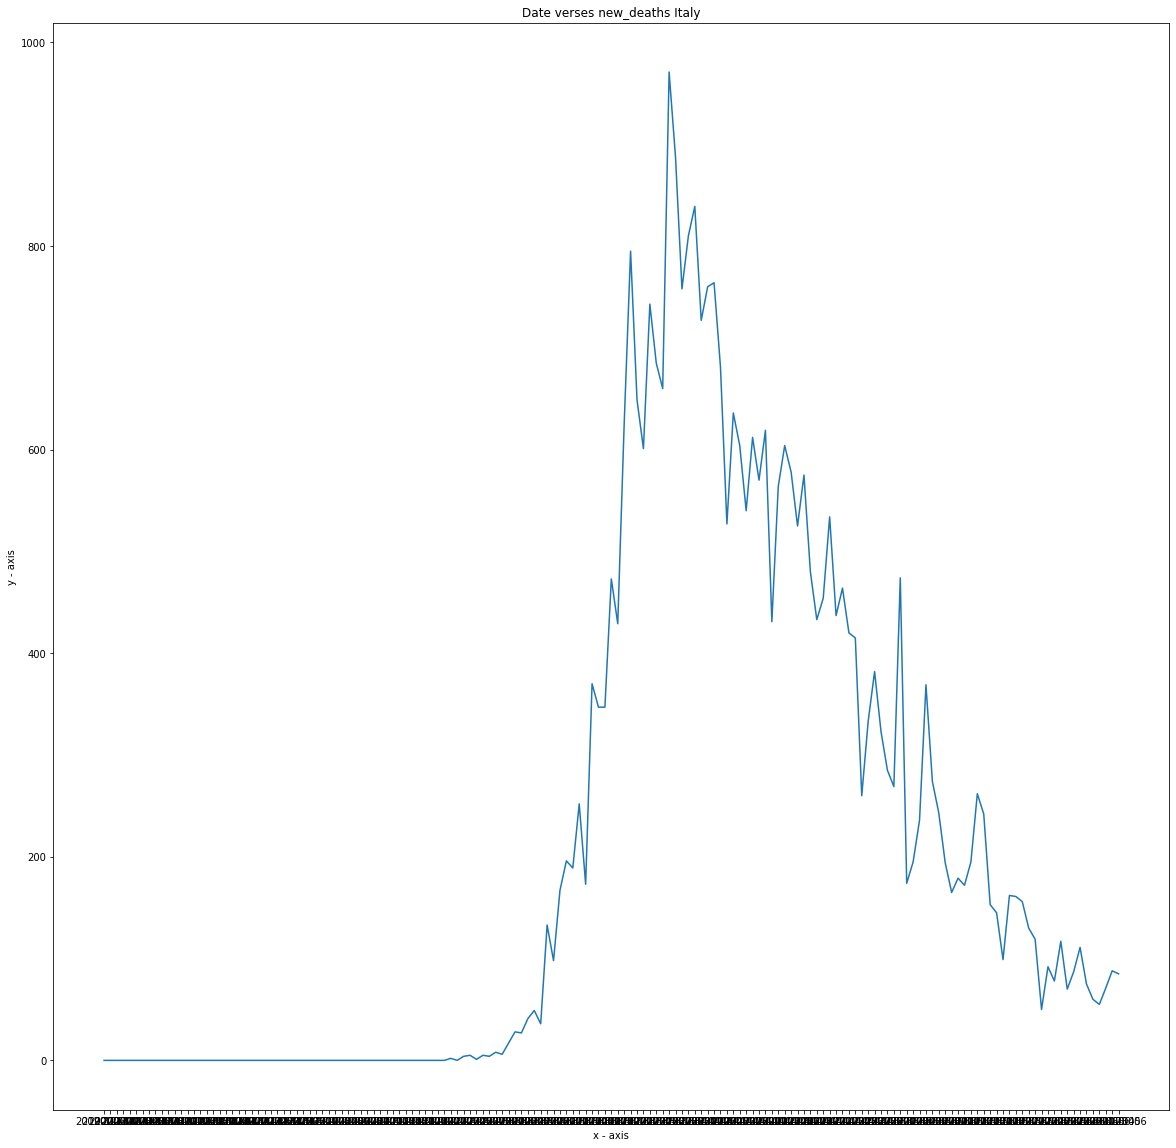

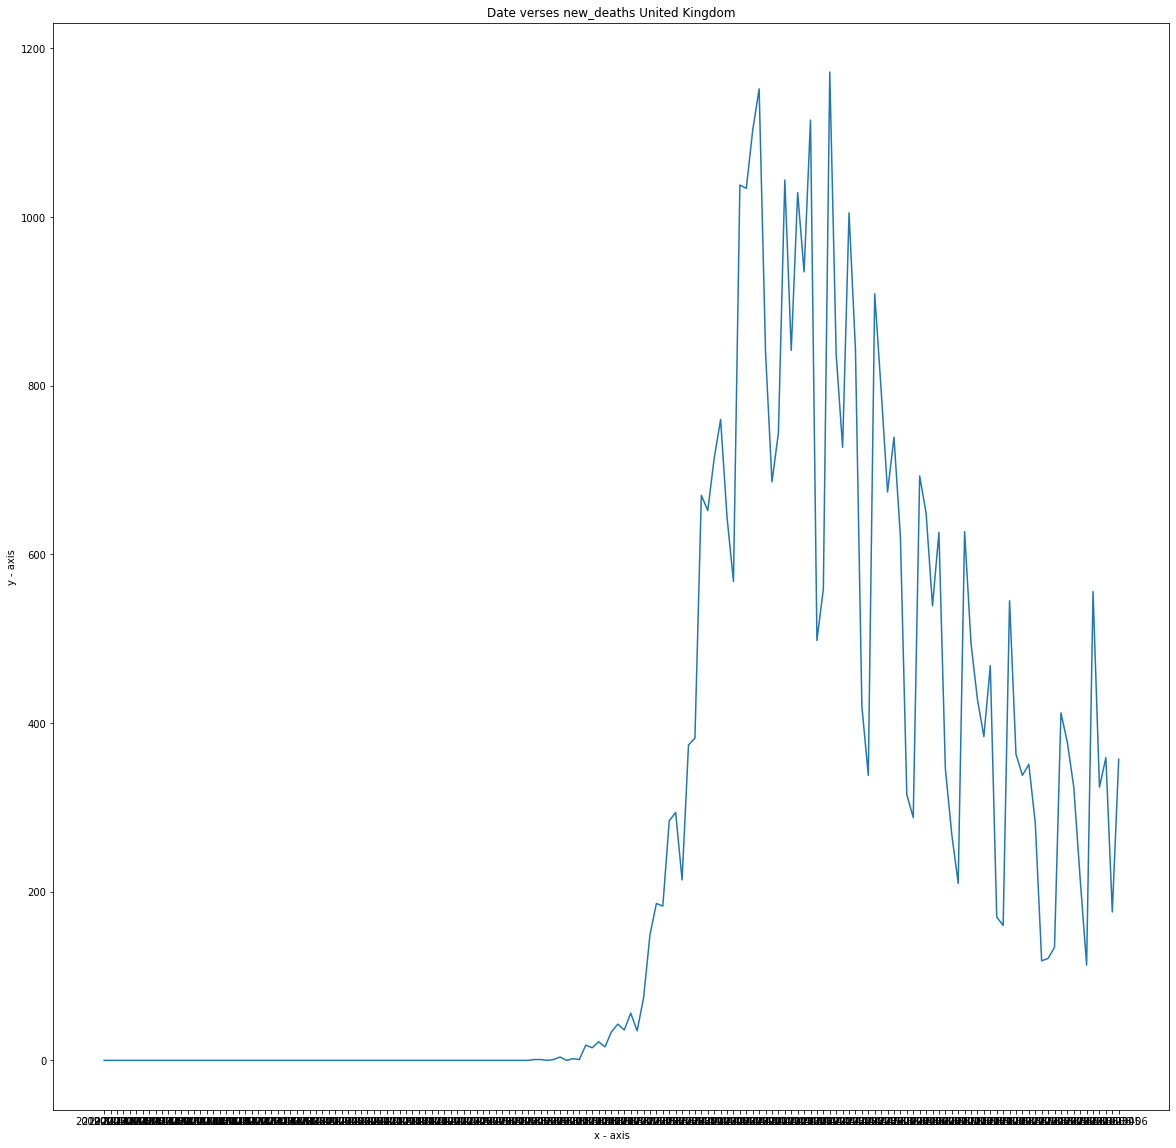

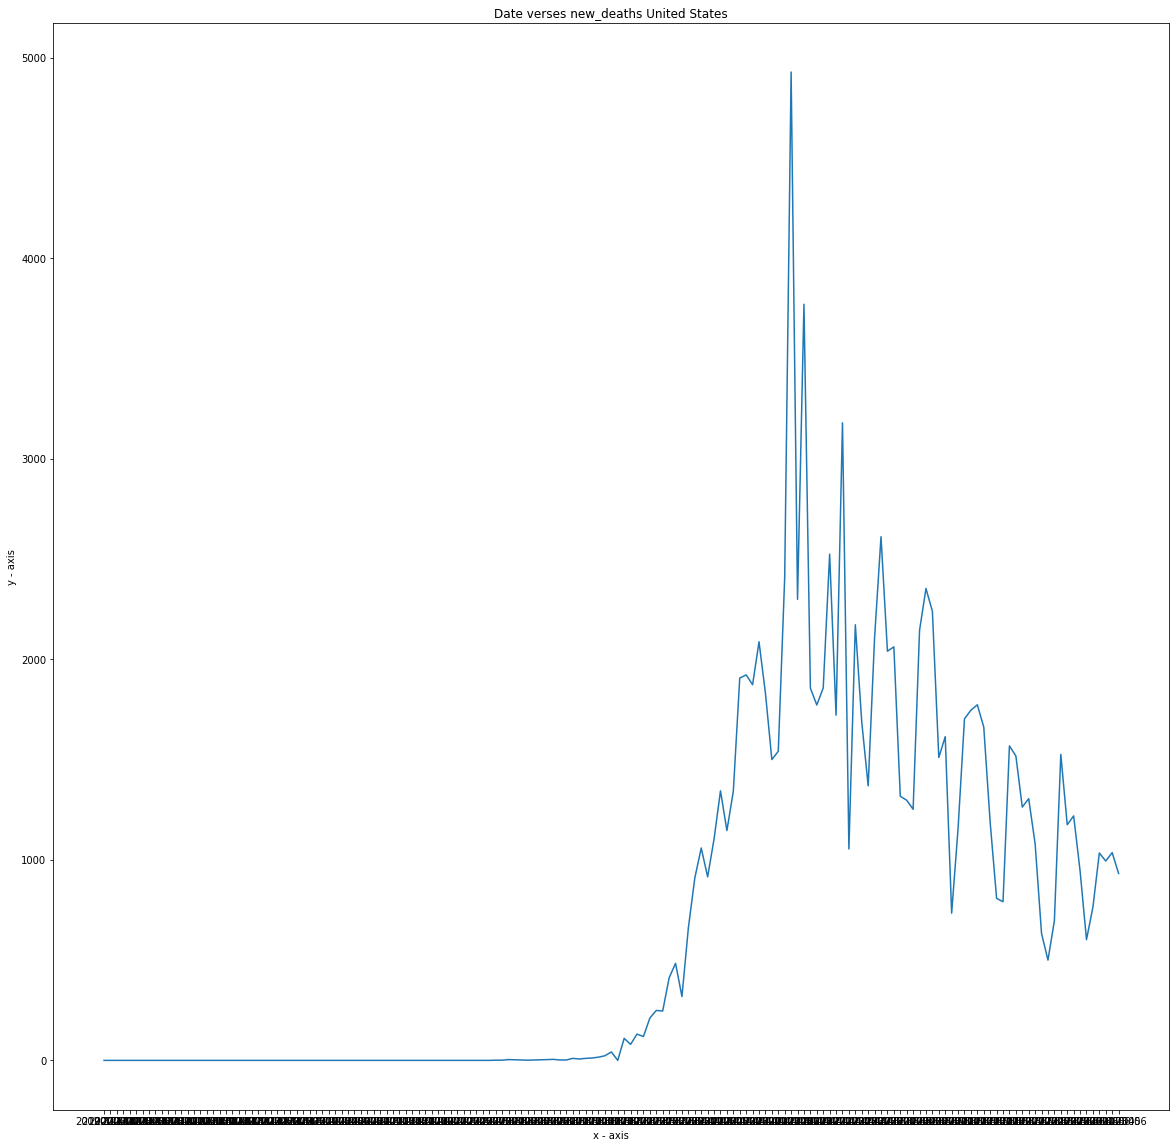

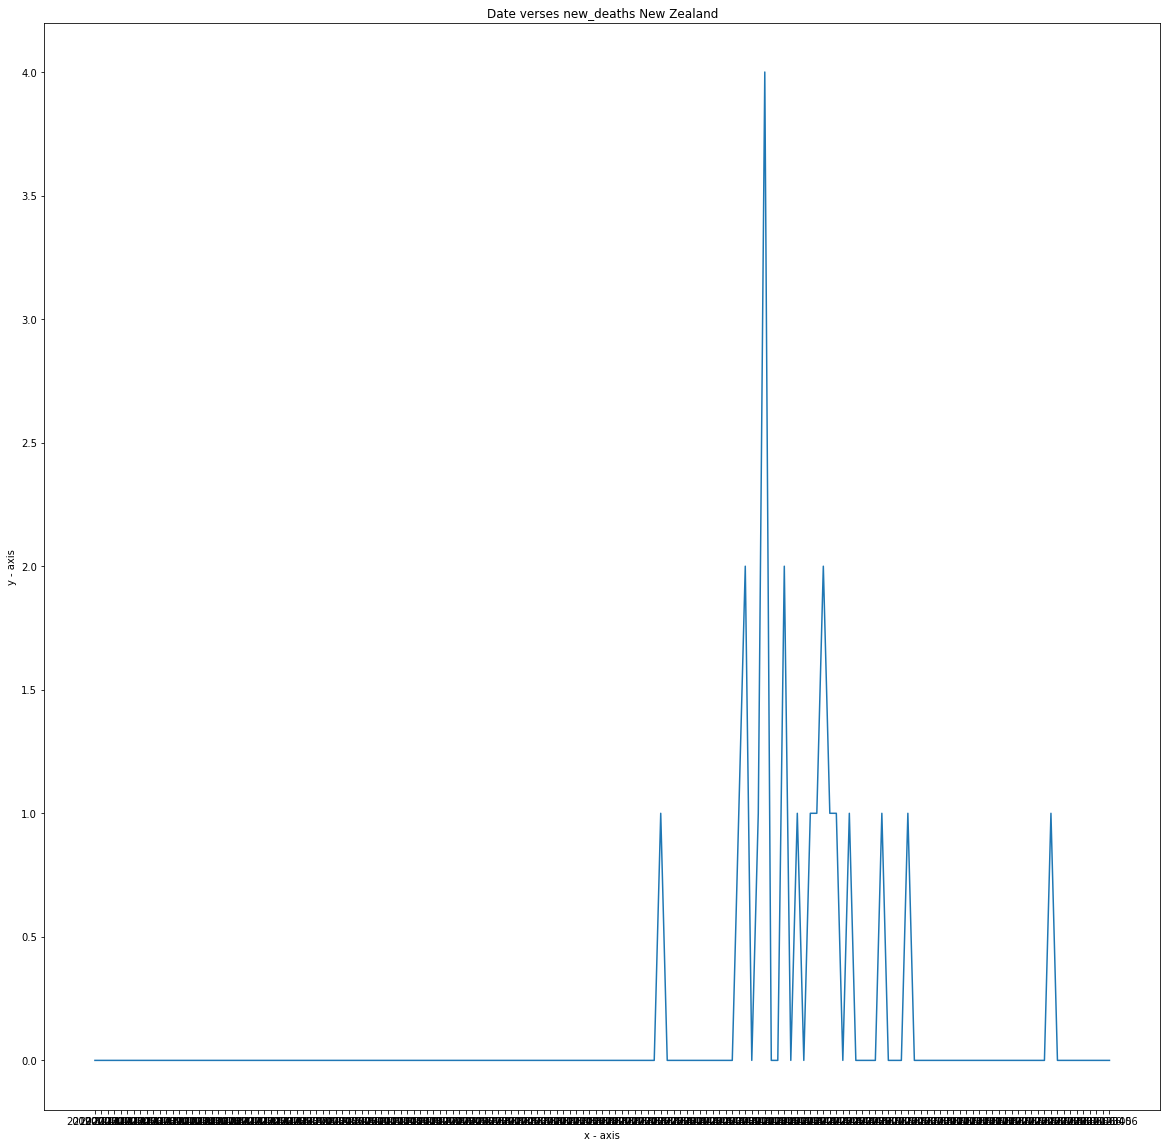

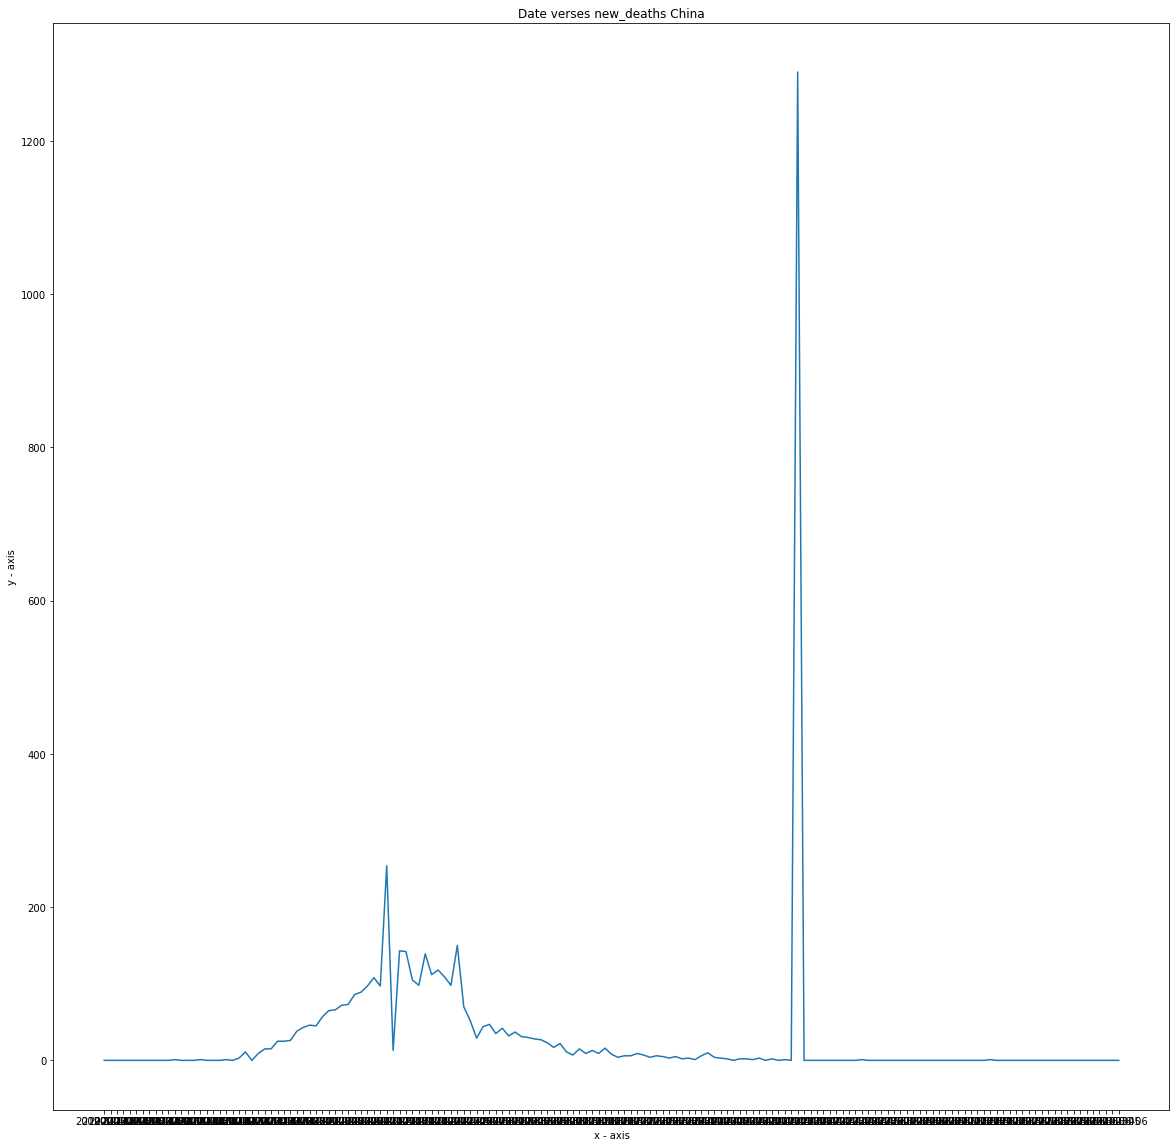

In [127]:
# Charting New deaths in all six countries.
#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 

# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths Ireland') 
  
# function to show the plot 
plt.savefig('Ireland_new_deaths_overtime.png')
plt.show() 



#x axis values 
x = coviddata_italy.date 
# corresponding y axis values 
y = coviddata_italy.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 

# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths Italy') 
  
# function to show the plot 
plt.savefig('Italy_new_deaths_overtime.png')
plt.show() 


#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 

# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths United Kingdom') 
  
# function to show the plot 

plt.savefig('UK_new_deaths_overtime.png')
plt.show() 



#x axis values 
x = coviddata_us.date 
# corresponding y axis values 
y = coviddata_us.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 

# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths United States') 
  
# function to show the plot 
plt.savefig('UK_new_deaths_overtime.png')
plt.show() 


#x axis values 
x = coviddata_nz.date 
# corresponding y axis values 
y = coviddata_nz.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths New Zealand') 
  
# function to show the plot 
plt.savefig('New_Zealand_new_deaths_overtime.png')
plt.show() 


#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 

# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths China') 
  
# function to show the plot 
plt.savefig('China_new_deaths_overtime.png')
plt.show() 


In [128]:
# Italy has the classic - steep rise then jagged decline graph.
# Ireland has a similar pattern
# China has a late spike due to misreporing.


In [ ]:
# Checking 2 countries for outliers, China and ireland. - 
# In china, a number of deaths were reported after the main outbreak. see the spike in china's graph above. 
sns.boxplot(x=coviddata_chn['new_deaths'])

In [ ]:
# In ireland there was a day where they added in a number of deaths in nursing homes, which were not initally included. These
# should be included in totals, and are reponsible for the spike seen in ireland's graph above
sns.boxplot(x=coviddata_ire['new_deaths'])

In [ ]:
# group by iso_code and get maximum in each country.
# coviddatabygroup = coviddata.groupby("iso_code")
# maximums = coviddatabygroup.max()
# maximums

Q1 = coviddata.quantile(0.25)
Q3 = coviddata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# Group by country, sum to get totals, and then sort to find the countries with highest number of deaths. 
coviddata_grouped=coviddata.groupby("location")
sum = coviddata_grouped.sum()
totals =sum.sort_values(by=['total_deaths'], ascending=False)
# maximums = maximums.reset_index()
totals

In [ ]:
top5=totals.head(6) # Note all top 5 are developed countries, so lets say people had access to healthcare. 
top5=top5.filter(['location', 'total_cases_per_million'])
top5

In [ ]:
# Plot of the Top 5 Countries and Deaths per million of population. World is also included, and is much lower, either
# either large part of the world not affect or not reported. 
my_plot = top5.plot(kind='bar')
# naming the x-axis 
plt.xlabel('Country') 
# naming the y-axis 
plt.ylabel('Deaths Per Million') 
# plot title 
plt.title('Bar chart of Top Five Countries and Death per million - and the world') 
plt.savefig('Bar_Chart_Top_five_countries_deaths_per_million_overtime.png')

In [ ]:
# The chart above should the main affected countries for now. However the relatively low number of deaths per million
# for the worlds, would suggest they are either not being reported or have yet to spread to some areas.

In [ ]:
coviddata.to_csv('output.csv', index = False)

In [ ]:
# https://www.kaggle.com/nhntran/covid-19-the-world-data-eda-and-visualization